In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
cd 'drive/My Drive/Colab Notebooks'

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content/drive/My Drive/Colab Notebooks


# **Instalando DT2**

In [19]:
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.7.1 False
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [7]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 247kB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-hffakrol
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-hffakrol
  Created wheel for fvcore: filename=fvcore-0.1.2-cp36-none-any.whl size=44581 sha256=724fc925e3cb2dbc855a0c8628fc9cc49410e4763ee5f0d3e61c9d14d18c5b25
  Stored in directory: /tmp/pip-ephem-wheel-cache-7ot2mkpo/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel for iopath: filename=iopath-0.1.2-cp36-none-any.whl size=10505 sha256=4a483648fc492608ca03d0a8e1a72c8b0a4c0bf9223e2797534d9d16c40597fe
  Stored in directory: /root/.cache/pip/wheels/9e/01/e4/1b68f5a2a6b9450ea4246d91840a77e1169f7d4722d76bbc47
Successfully built fvcore iopath
fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/drive/My%20Drive/Colab%20Notebooks/detectron2_repo
     |████████████████████████████████| 2.2MB 14.2MB/s 
ERROR: albumentat

# **Librerías Básicas**

In [4]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# **REGISTRO**

In [5]:
from detectron2.data.datasets import register_coco_instances

In [6]:
ls

'Copia de Detectron2 Tutorial.ipynb'   IMG/      Pruebas.ipynb
 detectron2_repo/                      output/


In [7]:
register_coco_instances("weldings", {}, "./IMG/info.json", "./IMG/images")

In [8]:
import random
from detectron2.utils.visualizer import Visualizer

In [9]:
dataset_dicts = DatasetCatalog.get("weldings")

[12/16 17:00:01 d2.data.datasets.coco]: Loading ./IMG/info.json takes 2.21 seconds.
[12/16 17:00:01 d2.data.datasets.coco]: Loaded 10 images in COCO format from ./IMG/info.json


In [11]:
prueba_metadata = MetadataCatalog.get("weldings")

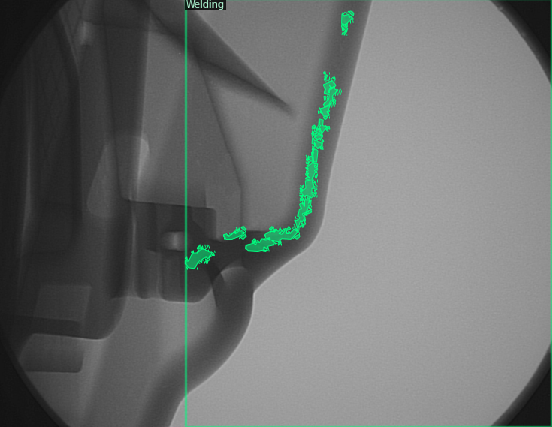

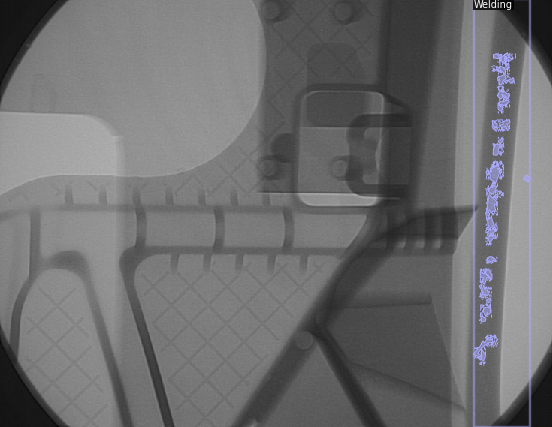

In [13]:
for d in random.sample(dataset_dicts, 2):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=prueba_metadata, scale=.75)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

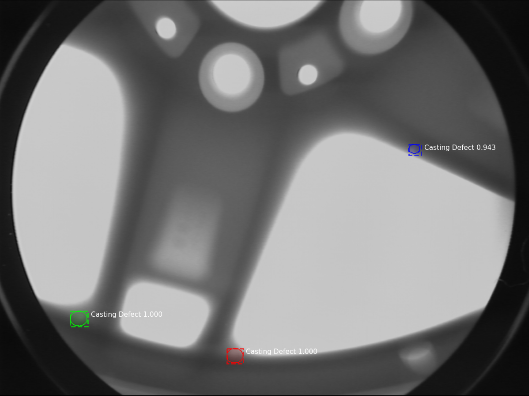

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('./IMG/C0001_0004.png')
cv2_imshow(img)

# **ENTRENAMIENTO**


In [26]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(
    "./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
cfg.DATASETS.TRAIN = ("weldings",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = (
    50
)  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    128
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # 3 classes (data, fig, hazelnut)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


In [27]:
import torch, torchvision

if torch.cuda.is_available():
  print('GPU available')
else:
  print('Please set GPU via Edit -> Notebook Settings.')

Please set GPU via Edit -> Notebook Settings.


In [15]:
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

RuntimeError: ignored